In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import image_proc as ip
import function as f
from decode import EAN13DECODER

%load_ext autoreload
%autoreload 2

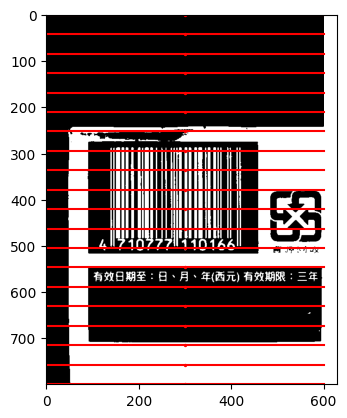

In [2]:
# img = cv2.imread("../img/barcode13.jpg")
img = cv2.imread("./test2.bmp")
# img = cv2.resize(img, (300, 400))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = ip.normalize(img)
img = ip.contrast(img, 0.8)
img = ip.gaussian_blur(img)

mean,std = cv2.meanStdDev(img)
# raise up the value to keep more black pixels
th = 0.5
img = ip.binarize(img, th)
img = 1 - img
line_num = 20
angle = 90
# 0<=angle<=180
x,y,lines = f.apply_scanline(img, line_num, angle, resolution=1000)

plt.imshow(img, cmap="gray")
plt.scatter(x, y, c="r", s=2)


for x_, y_ in zip(x, y):
    xx = np.linspace(0, img.shape[1], 100)
    yy = y_ + (xx - x_) * np.tan((angle-90) / 180 * np.pi)
    plt.plot(xx, yy, c="r")

plt.show()
np.save("lines.npy", lines)

## Here

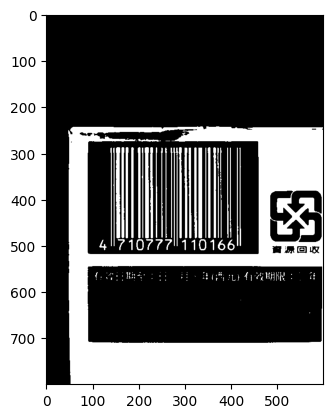

In [3]:
# img = cv2.imread("../img/barcode13.jpg")
img = cv2.imread("./test2.bmp")

H, W = img.shape[:2]
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

if H > W:
    img = ip.resize(img, (800, 600))
else:
    img = ip.resize(img, (600, 800))


img = ip.normalize(img)
img = ip.gaussian_blur(img)



img = ip.adaptive_binarize(img, th_shift=-0.1)

img = 1 - img
plt.imshow(img, cmap="gray")

In [4]:
# import seaborn as sns
# import pandas as pd

# barcodes = []
# with open('./barcodes.txt', 'r') as f:
#     for line in f:
#         barcodes.append(line.strip())

# all_interv = []
# for barcode in barcodes:
#     interv_count = np.zeros(6)
#     barcode_nplist = np.array([int(i) for i in barcode])
#     decoder = EAN13DECODER()
#     intervals, _ = decoder.get_intervals(barcode=barcode_nplist)

#     for i in intervals:
#         interv_count[i] += 1

#     for i in range(6):
#         all_interv.append({
#             "freq": i,
#             "count": interv_count[i],
#         })

# all_interv = pd.DataFrame(all_interv)
# sns.set_style("whitegrid")
# sns.barplot(x="freq", y="count", data=all_interv)

# plt.xticks(np.arange(6))
# plt.xlim(0.5, 4.5)


FileNotFoundError: [Errno 2] No such file or directory: './barcodes.txt'

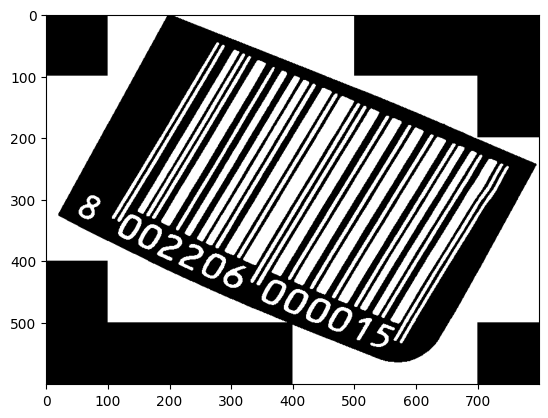

/home/cellery/venv/myenv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/cellery/venv/myenv/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Fail! Please drop this class.


In [17]:
from decode import DECODEDONE

img = cv2.imread("../img/barcode13.jpg")
# img = cv2.imread("./test2.bmp")

H, W = img.shape[:2]
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

if H > W:
    img = ip.resize(img, (800, 600))
else:
    img = ip.resize(img, (600, 800))


img = ip.normalize(img)


# img = ip.contrast(img, 0.8)
img = ip.gaussian_blur(img)

# mean,std = cv2.meanStdDev(img)
# raise up the value to keep more black pixels
# th = 0.5
# img = ip.binarize(img, th)

img = ip.adaptive_binarize(img, th_shift=-0.1)

img = 1 - img
line_num = 100
angles = [ 90, 60, 120, 30, 150, 0, 180]
# angles = [90]
# tilts = [None, 1, -1, 3, -3, 5, -5, 7, -7]
tilts = [None]
# torelances = [2, 3, 4, 5, 1]
torelances = [5]
# 0<=angle<=180

plt.imshow(img, cmap="gray")
plt.show()

status = 'fail'
break_all = False

for tilt in tilts:
    for torelance in torelances:
        for angle in angles:
            x,y,lines = f.apply_scanline(img, line_num, angle, resolution=1000)
            for i in lines:
                if i is None:
                    continue
                try:
                    i = np.array(i)
                    decoder = EAN13DECODER(i, tolerance=torelance)
                    # decoder.plot_line()
                    _, code, status = decoder.get_barcode()
                    print(code)
                    print(_)

                    if status == 'success':
                        final_code = code
                        show_text = 'OK ' + final_code
                        plt.imshow(img, cmap="gray")
                        plt.text(5, 5, show_text, ha='left', va='top', fontsize=14, color="r")
                        plt.show()
                        raise DECODEDONE('done')

                except Exception as e:
                    # if is DECODERERROR, then continue
                    if e.__class__.__name__ == "DECODERERROR":
                        # print(e)
                        continue
                    else:
                        if e.__class__.__name__ == "DECODEDONE":
                            print("Done!")
                            break_all = True
                            break
                        else:
                            raise e
                        
            if break_all:
                break

        if break_all:
            break

    if break_all:
        break

if status == 'fail':
    import webbrowser
    print("Fail! Please drop this class.")
    webbrowser.open_new('./fail.pdf')